In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint
import csv

# Imported API Key
from keys import covid

In [2]:
# List of county fips & query url to retrieve data for both
#counties = ['Los Angeles County','Travis County','New York County']
counties = ['06037','48015','36061']

query_county = 'https://api.covidactnow.org/v2/county/{counties}.timeseries.json?apiKey={covid}'

In [3]:
# Los Angeles County
headers = {
        'Accept': 'application/json',
        'content-Type': 'application/json'
}
response = requests.get(f"https://api.covidactnow.org/v2/county/{counties[0]}.timeseries.json?apiKey={covid}", headers=headers, data={})
myjson = response.json()

#print(json.dumps(myjson, indent=4, sort_keys=True))

In [4]:
# Extracting specified data from json file for Los Angeles County

la_cases_per_date = []
la_dates = []
la_deaths = []

la = myjson['actualsTimeseries']

for i in range(len(la)):
       la_cases_per_date.append(la[i]['cases'])
       la_dates.append(la[i]['date'])
       la_deaths.append(la[i]['deaths'])

In [5]:
# Coverted to datetime to be able manipulate data as needed for Los Angeles County
la_df = pd.DataFrame({'Date':la_dates,
                        'Total Cases to Date':la_cases_per_date,
                            'Deaths':la_deaths})

la_df['Date'] = pd.to_datetime(la_df['Date'])
la_df.head()

,Date,Total Cases to Date,Deaths
0,2020-01-05,NaN,NaN
1,2020-01-26,1.0,0.0
2,2020-01-27,1.0,0.0
3,2020-01-28,1.0,0.0
4,2020-01-29,1.0,0.0


In [6]:
# Grouped data by the month with the max number of cases and deaths per for Los Angeles County/Final DataFrame
los_angeles_df = pd.DataFrame(la_df.groupby(pd.Grouper(key='Date', freq='M')).max())

los_angeles_df2 = los_angeles_df.reset_index()

los_angeles_df2['Date'] = los_angeles_df2['Date'].dt.strftime('%Y-%m')

los_angeles_df2

,Date,Total Cases to Date,Deaths
0,2020-01,1.0,0.0
1,2020-02,1.0,0.0
2,2020-03,3011.0,54.0
3,2020-04,23182.0,1111.0
4,2020-05,54996.0,2362.0
5,2020-06,103529.0,3369.0
6,2020-07,188481.0,4621.0
7,2020-08,241768.0,5784.0
8,2020-09,270299.0,6576.0
9,2020-10,307618.0,7071.0


In [7]:
# Parameter for charts
plt.rcParams["figure.figsize"] = (15,5.5)

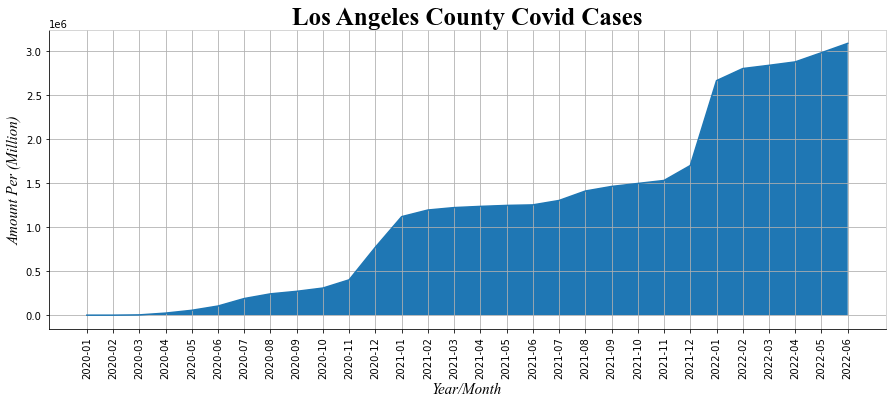

In [8]:
# Los Angeles County Cases Chart
la_months = los_angeles_df2['Date']
la_cases = los_angeles_df2['Total Cases to Date']

ax = plt.subplot(111)
l = ax.fill_between(la_months, la_cases)

plt.plot(la_months, la_cases)
plt.title('Los Angeles County Covid Cases',font='Times New Roman',fontsize=25,weight='bold')
plt.xlabel('Year/Month',font='Times New Roman',style='italic',fontsize=15)
plt.ylabel('Amount Per (Million)',font='Times New Roman',style='italic',fontsize=15)
plt.xticks(rotation = 90)

ax.spines['right'].set_color((.8,.8,.8))
ax.spines['top'].set_color((.8,.8,.8))

ax.grid('on')
plt.show()


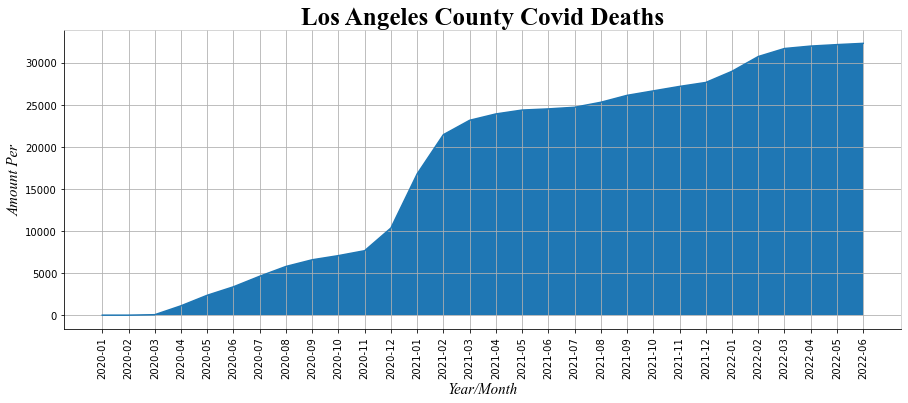

In [9]:
# Los Angeles County Deaths Chart
la_per_deaths = los_angeles_df2['Deaths']

ax = plt.subplot(111)
l = ax.fill_between(la_months, la_per_deaths)

plt.plot(la_months, la_per_deaths)
plt.title('Los Angeles County Covid Deaths',font='Times New Roman',fontsize=25,weight='bold')
plt.xlabel('Year/Month',font='Times New Roman',style='italic',fontsize=15)
plt.ylabel('Amount Per',font='Times New Roman',style='italic',fontsize=15)
plt.xticks(rotation = 90)

ax.spines['right'].set_color((.8,.8,.8))
ax.spines['top'].set_color((.8,.8,.8))

ax.grid('on')
plt.show()

In [10]:
# Austin/Travis County
headers = {
        'Accept': 'application/json',
        'content-Type': 'application/json'
}
response = requests.get(f"https://api.covidactnow.org/v2/county/{counties[1]}.timeseries.json?apiKey={covid}", headers=headers, data={})
myjson = response.json()

In [11]:
# Extracting specified data from json file for Travis County

au_cases_per_date = []
au_dates = []
au_deaths = []

au = myjson['actualsTimeseries']

for i in range(len(au)):
       au_cases_per_date.append(au[i]['cases'])
       au_dates.append(au[i]['date'])
       au_deaths.append(au[i]['deaths'])

In [12]:
# Coverted to datetime to be able manipulate data as needed for Travis County
au_df = pd.DataFrame({'Date':au_dates,
                        'Total Cases to Date':au_cases_per_date,
                            'Deaths':au_deaths})

au_df['Date'] = pd.to_datetime(au_df['Date'])
au_df.head()

,Date,Total Cases to Date,Deaths
0,2020-03-17,NaN,NaN
1,2020-03-18,NaN,NaN
2,2020-03-19,NaN,NaN
3,2020-03-20,NaN,NaN
4,2020-03-21,NaN,NaN


In [25]:
# Grouped data by the month with the max number of cases and deaths per for Travis County/Final DataFrame
austin_df = pd.DataFrame(au_df.groupby(pd.Grouper(key='Date', freq='M')).max())

austin_df2 = austin_df.reset_index()

austin_df2['Date'] = austin_df2['Date'].dt.strftime('%Y-%m')

austin_df2

,Date,Total Cases to Date,Deaths
0,2020-03,2.0,0.0
1,2020-04,13.0,0.0
2,2020-05,26.0,0.0
3,2020-06,71.0,0.0
4,2020-07,212.0,5.0
5,2020-08,417.0,6.0
6,2020-09,499.0,9.0
7,2020-10,517.0,10.0
8,2020-11,632.0,11.0
9,2020-12,1030.0,14.0


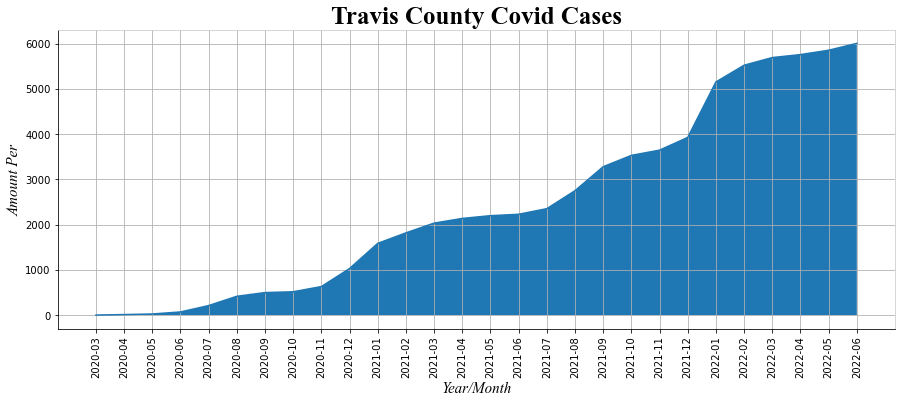

In [14]:
# Travis County Cases Chart
au_months = austin_df2['Date']
au_cases = austin_df2['Total Cases to Date']

ax = plt.subplot(111)
l = ax.fill_between(au_months, au_cases)

plt.plot(au_months, au_cases)
plt.title('Travis County Covid Cases',font='Times New Roman',fontsize=25,weight='bold')
plt.xlabel('Year/Month',font='Times New Roman',style='italic',fontsize=15)
plt.ylabel('Amount Per',font='Times New Roman',style='italic',fontsize=15)
plt.xticks(rotation = 90)

ax.spines['right'].set_color((.8,.8,.8))
ax.spines['top'].set_color((.8,.8,.8))

ax.grid('on')
plt.show()


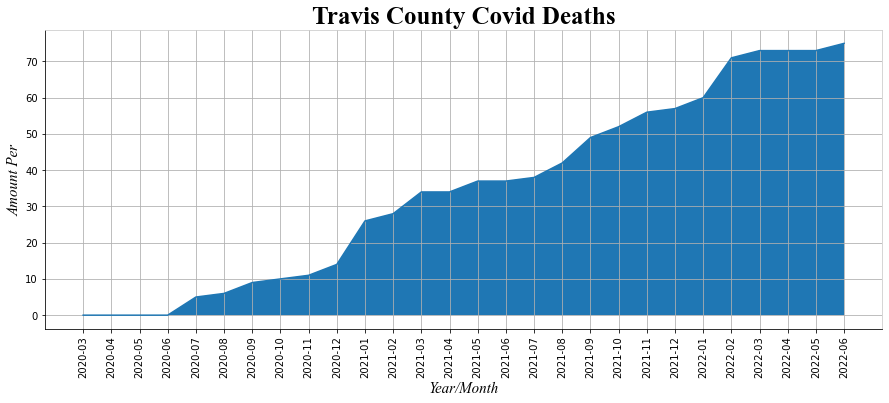

In [15]:
# Travis County Deaths Chart
au_per_deaths = austin_df2['Deaths']

ax = plt.subplot(111)
l = ax.fill_between(au_months, au_per_deaths)

plt.plot(au_months, au_per_deaths)
plt.title('Travis County Covid Deaths',font='Times New Roman',fontsize=25,weight='bold')
plt.xlabel('Year/Month',font='Times New Roman',style='italic',fontsize=15)
plt.ylabel('Amount Per',font='Times New Roman',style='italic',fontsize=15)
plt.xticks(rotation = 90)

ax.spines['right'].set_color((.8,.8,.8))
ax.spines['top'].set_color((.8,.8,.8))

ax.grid('on')
plt.show()

In [16]:
# New York County
headers = {
        'Accept': 'application/json',
        'content-Type': 'application/json'
}
response = requests.get(f"https://api.covidactnow.org/v2/county/{counties[2]}.timeseries.json?apiKey={covid}", headers=headers, data={})
myjson = response.json()

In [17]:
# Extracting specified data from json file for New York County

ny_cases_per_date = []
ny_dates = []
ny_deaths = []

ny = myjson['actualsTimeseries']

for i in range(len(ny)):
       ny_cases_per_date.append(ny[i]['cases'])
       ny_dates.append(ny[i]['date'])
       ny_deaths.append(ny[i]['deaths'])

In [18]:
# Coverted to datetime to be able manipulate data as needed for New York County
ny_df = pd.DataFrame({'Date':ny_dates,
                        'Total Cases to Date':ny_cases_per_date,
                            'Deaths':ny_deaths})

ny_df['Date'] = pd.to_datetime(ny_df['Date'])
ny_df.head()

,Date,Total Cases to Date,Deaths
0,2020-01-22,0.0,0.0
1,2020-01-23,0.0,0.0
2,2020-01-24,0.0,0.0
3,2020-01-25,0.0,0.0
4,2020-01-26,0.0,0.0


In [19]:
# Grouped data by the month with the max number of cases and deaths per for New York County/Final DataFrame
new_york_df = pd.DataFrame(ny_df.groupby(pd.Grouper(key='Date', freq='M')).max())

new_york_df2 = new_york_df.reset_index()

new_york_df2['Date'] = new_york_df2['Date'].dt.strftime('%Y-%m')

new_york_df2

,Date,Total Cases to Date,Deaths
0,2020-01,0.0,0.0
1,2020-02,0.0,0.0
2,2020-03,6539.0,129.0
3,2020-04,21920.0,2132.0
4,2020-05,26653.0,2912.0
5,2020-06,28447.0,3088.0
6,2020-07,30458.0,3146.0
7,2020-08,32119.0,3170.0
8,2020-09,33561.0,3178.0
9,2020-10,36522.0,3198.0


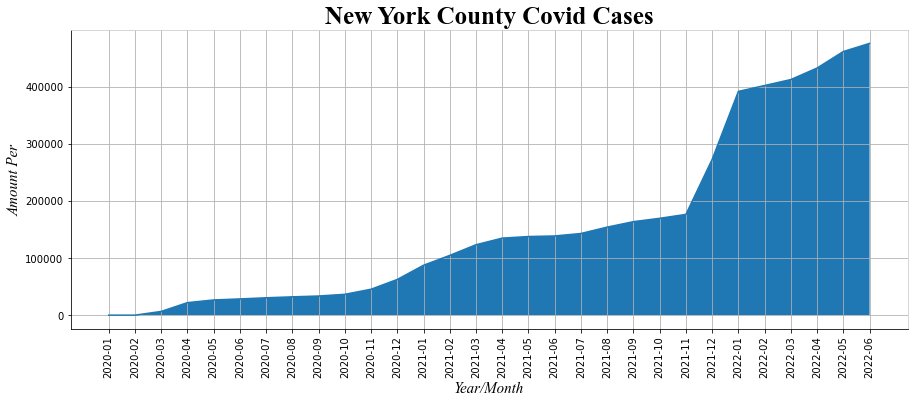

In [20]:
# New York County Cases Chart
ny_months = new_york_df2['Date']
ny_cases = new_york_df2['Total Cases to Date']

ax = plt.subplot(111)
l = ax.fill_between(ny_months, ny_cases)

plt.plot(ny_months, ny_cases)
plt.title('New York County Covid Cases',font='Times New Roman',fontsize=25,weight='bold')
plt.xlabel('Year/Month',font='Times New Roman',style='italic',fontsize=15)
plt.ylabel('Amount Per',font='Times New Roman',style='italic',fontsize=15)
plt.xticks(rotation = 90)

ax.spines['right'].set_color((.8,.8,.8))
ax.spines['top'].set_color((.8,.8,.8))

ax.grid('on')
plt.show()


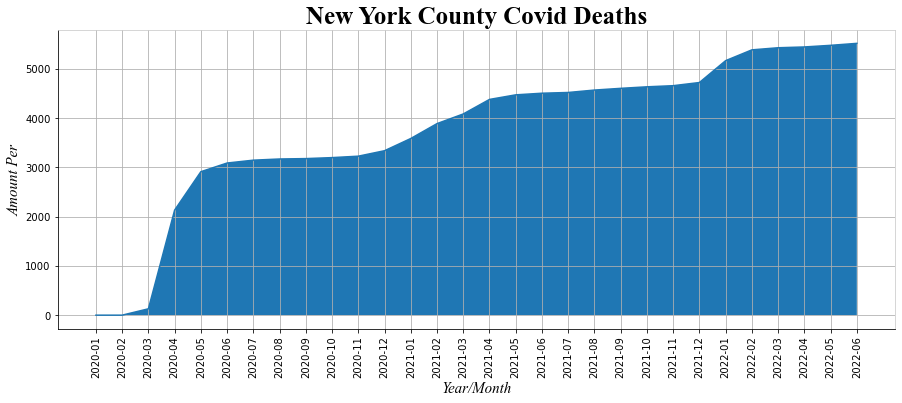

In [21]:
# New York County Deaths Chart
ny_per_deaths = new_york_df2['Deaths']

ax = plt.subplot(111)
l = ax.fill_between(ny_months, ny_per_deaths)

plt.plot(ny_months, ny_per_deaths)
plt.title('New York County Covid Deaths',font='Times New Roman',fontsize=25,weight='bold')
plt.xlabel('Year/Month',font='Times New Roman',style='italic',fontsize=15)
plt.ylabel('Amount Per',font='Times New Roman',style='italic',fontsize=15)
plt.xticks(rotation = 90)

ax.spines['right'].set_color((.8,.8,.8))
ax.spines['top'].set_color((.8,.8,.8))

ax.grid('on')
plt.show()

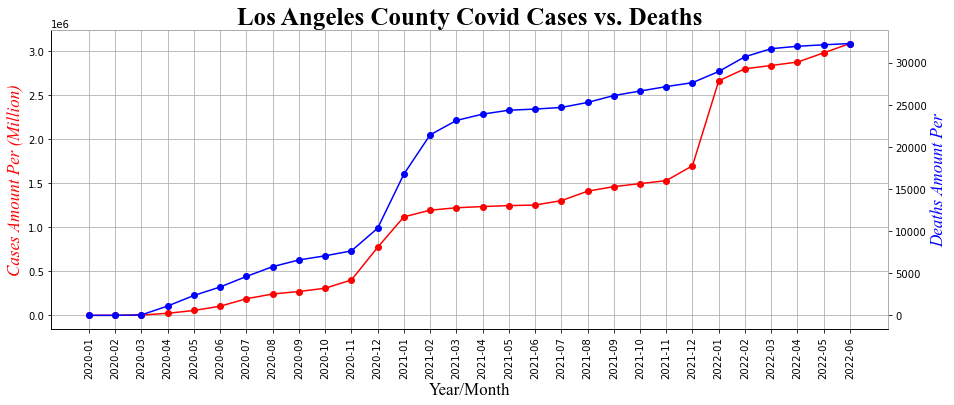

In [22]:
# Los Angeles County Covid Cases vs. Deaths Chart
fig,ax = plt.subplots()

plt.xticks(rotation = 90)
plt.title('Los Angeles County Covid Cases vs. Deaths',font='Times New Roman',fontsize=25,weight='bold')

# Axis 1
ax.plot(la_months, la_cases, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year/Month",font='Times New Roman',fontsize=17)
# set y-axis label
ax.set_ylabel("Cases Amount Per (Million)",font='Times New Roman',style='italic' ,color="red",fontsize=17)

# Axis 2
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(la_months, la_per_deaths,color="blue",marker="o")
ax2.set_ylabel("Deaths Amount Per",font='Times New Roman',style='italic',color="blue",fontsize=17)

# Top and right spine transparency
ax2.spines['right'].set_color((.8,.8,.8))
ax2.spines['top'].set_color((.8,.8,.8))

ax.grid('on')
plt.show()
#save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')



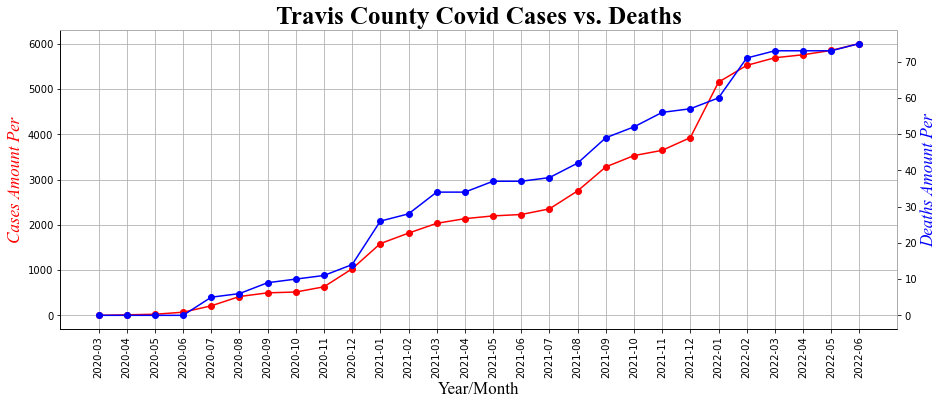

In [23]:
# Travis County Covid Cases vs. Deaths Chart
fig,ax = plt.subplots()

plt.xticks(rotation = 90)
plt.title('Travis County Covid Cases vs. Deaths',font='Times New Roman',fontsize=25,weight='bold')

# Axis 1
ax.plot(au_months, au_cases, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year/Month",font='Times New Roman',fontsize=17)
# set y-axis label
ax.set_ylabel("Cases Amount Per",font='Times New Roman',style='italic' ,color="red",fontsize=17)

# Axis 2
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(au_months, au_per_deaths,color="blue",marker="o")
ax2.set_ylabel("Deaths Amount Per",font='Times New Roman',style='italic',color="blue",fontsize=17)

# Top and right spine transparency
ax2.spines['right'].set_color((.8,.8,.8))
ax2.spines['top'].set_color((.8,.8,.8))

ax.grid('on')
plt.show()
#save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')



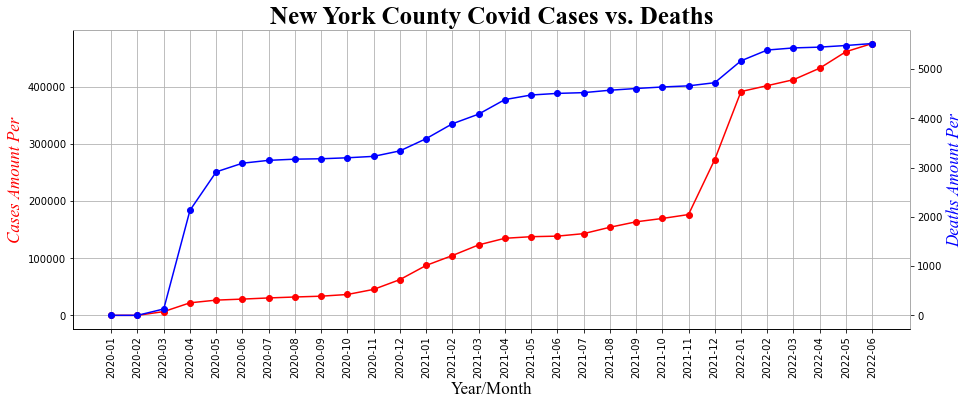

In [24]:
# New York County Covid Cases vs. Deaths Chart
fig,ax = plt.subplots()

plt.xticks(rotation = 90)
plt.title('New York County Covid Cases vs. Deaths',font='Times New Roman',fontsize=25,weight='bold')

# Axis 1
ax.plot(ny_months, ny_cases, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Year/Month",font='Times New Roman',fontsize=17)
# set y-axis label
ax.set_ylabel("Cases Amount Per",font='Times New Roman',style='italic' ,color="red",fontsize=17)

# Axis 2
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ny_months, ny_per_deaths,color="blue",marker="o")
ax2.set_ylabel("Deaths Amount Per",font='Times New Roman',style='italic',color="blue",fontsize=17)

# Top and right spine transparency
ax2.spines['right'].set_color((.8,.8,.8))
ax2.spines['top'].set_color((.8,.8,.8))

ax.grid('on')
plt.show()
#save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

